In [ ]:
# Skewness Analysis with the California Housing Dataset

## Introduction
# In this notebook, we'll explore the concept of skewness using the California Housing dataset. Skewness measures the asymmetry of the distribution of values in a dataset. We'll calculate and visualize the skewness of different numerical columns in the dataset and provide comments on the skewness, mean, and median.

# Let's start by importing the necessary libraries.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)
data = housing.frame

# Display the first few rows of the dataset
data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:

# Brief summary of the dataset
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


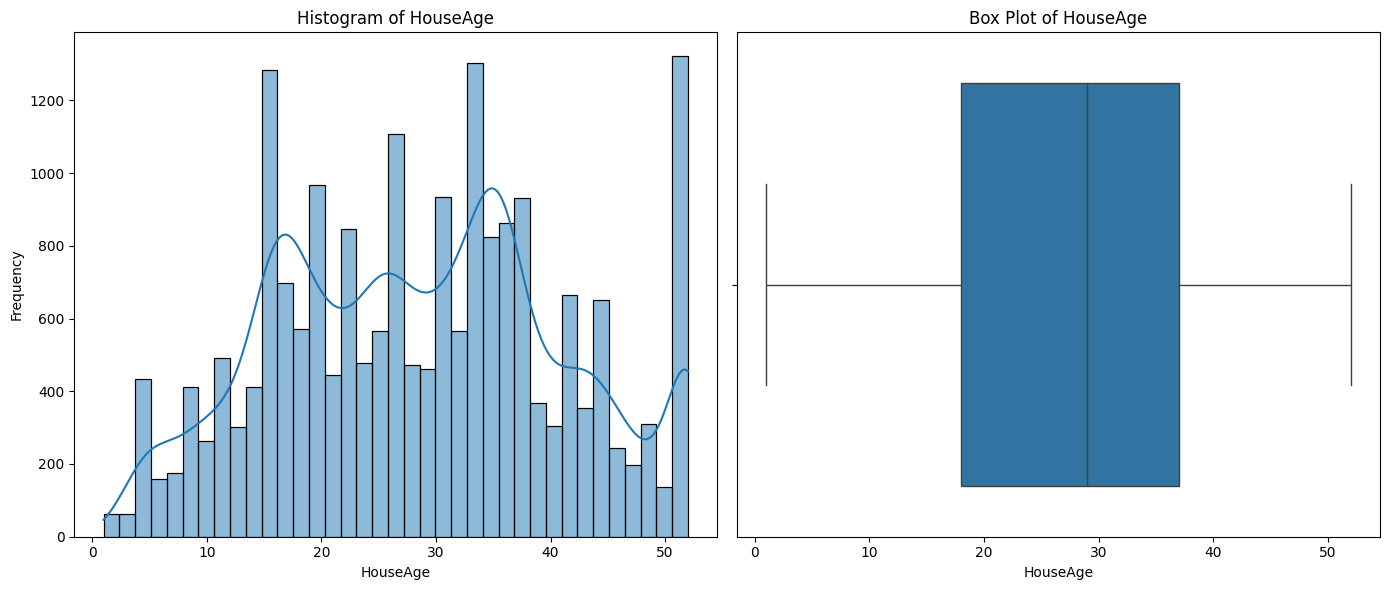

In [ ]:


# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot histogram of total_bill
sns.histplot(data['HouseAge'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of HouseAge')
axes[0].set_xlabel('HouseAge')
axes[0].set_ylabel('Frequency')

# Plot box plot of total_bill
sns.boxplot(x=data['HouseAge'], ax=axes[1])
axes[1].set_title('Box Plot of HouseAge')
axes[1].set_xlabel('HouseAge')

# Show plots
plt.tight_layout()
plt.show()

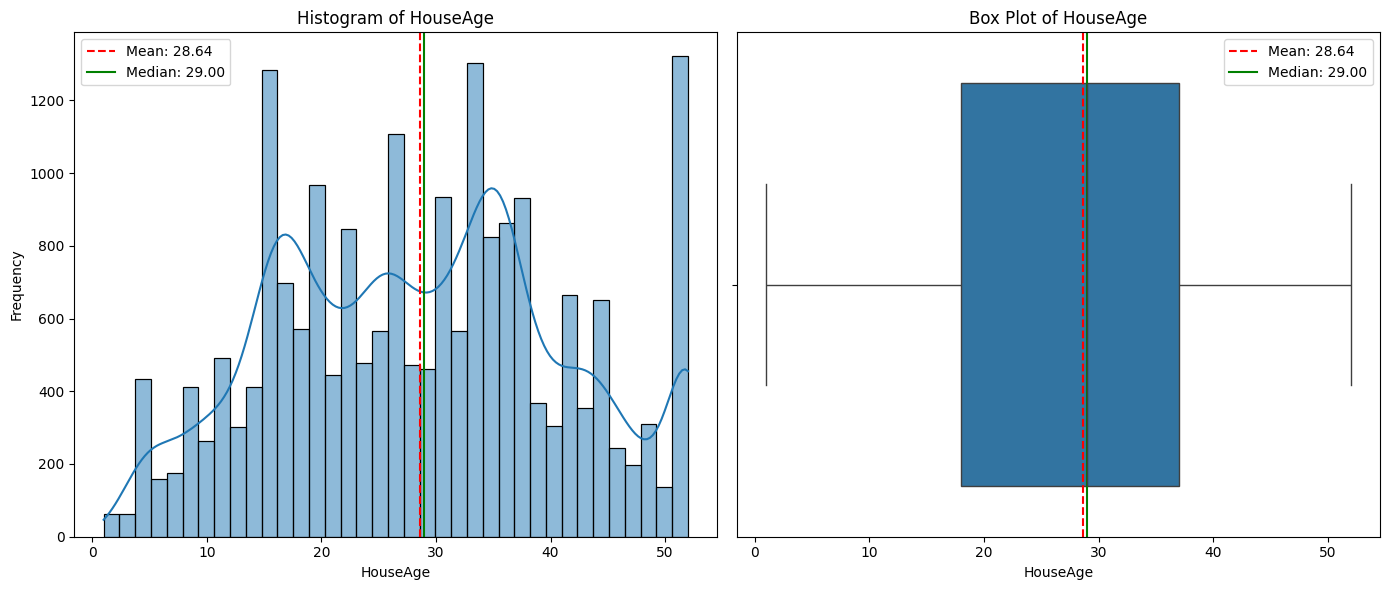

In [ ]:
# Calculate mean and median of total_bill
mean_houseage = data['HouseAge'].mean()
median_houseage = data['HouseAge'].median()

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot histogram of total_bill
sns.histplot(data['HouseAge'], kde=True, ax=axes[0])
axes[0].axvline(mean_houseage, color='r', linestyle='--', label=f'Mean: {mean_houseage:.2f}')
axes[0].axvline(median_houseage, color='g', linestyle='-', label=f'Median: {median_houseage:.2f}')
axes[0].set_title('Histogram of HouseAge')
axes[0].set_xlabel('HouseAge')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Plot box plot of total_bill
sns.boxplot(x=data['HouseAge'], ax=axes[1])
axes[1].axvline(mean_houseage, color='r', linestyle='--', label=f'Mean: {mean_houseage:.2f}')
axes[1].axvline(median_houseage, color='g', linestyle='-', label=f'Median: {median_houseage:.2f}')
axes[1].set_title('Box Plot of HouseAge')
axes[1].set_xlabel('HouseAge')
axes[1].legend()

# Show plots
plt.tight_layout()
plt.show()


In [ ]:
def univariate_Analysis(col_name):
  # Calculate mean and median of total_bill
  mean_houseage = data[col_name].mean()
  median_houseage = data[col_name].median()

  # Create a figure with subplots
  fig, axes = plt.subplots(1, 2, figsize=(14, 6))

  # Plot histogram of total_bill
  sns.histplot(data[col_name], kde=True, ax=axes[0])
  axes[0].axvline(mean_houseage, color='r', linestyle='--', label=f'Mean: {mean_houseage:.2f}')
  axes[0].axvline(median_houseage, color='g', linestyle='-', label=f'Median: {median_houseage:.2f}')
  axes[0].set_title('Histogram of '+col_name)
  axes[0].set_xlabel(col_name)
  axes[0].set_ylabel('Frequency')
  axes[0].legend()

  # Plot box plot of total_bill
  sns.boxplot(x=data[col_name], ax=axes[1])
  axes[1].axvline(mean_houseage, color='r', linestyle='--', label=f'Mean: {mean_houseage:.2f}')
  axes[1].axvline(median_houseage, color='g', linestyle='-', label=f'Median: {median_houseage:.2f}')
  axes[1].set_title('Box Plot of '+col_name)
  axes[1].set_xlabel(col_name)
  axes[1].legend()

  # Show plots
  plt.tight_layout()
  plt.show()


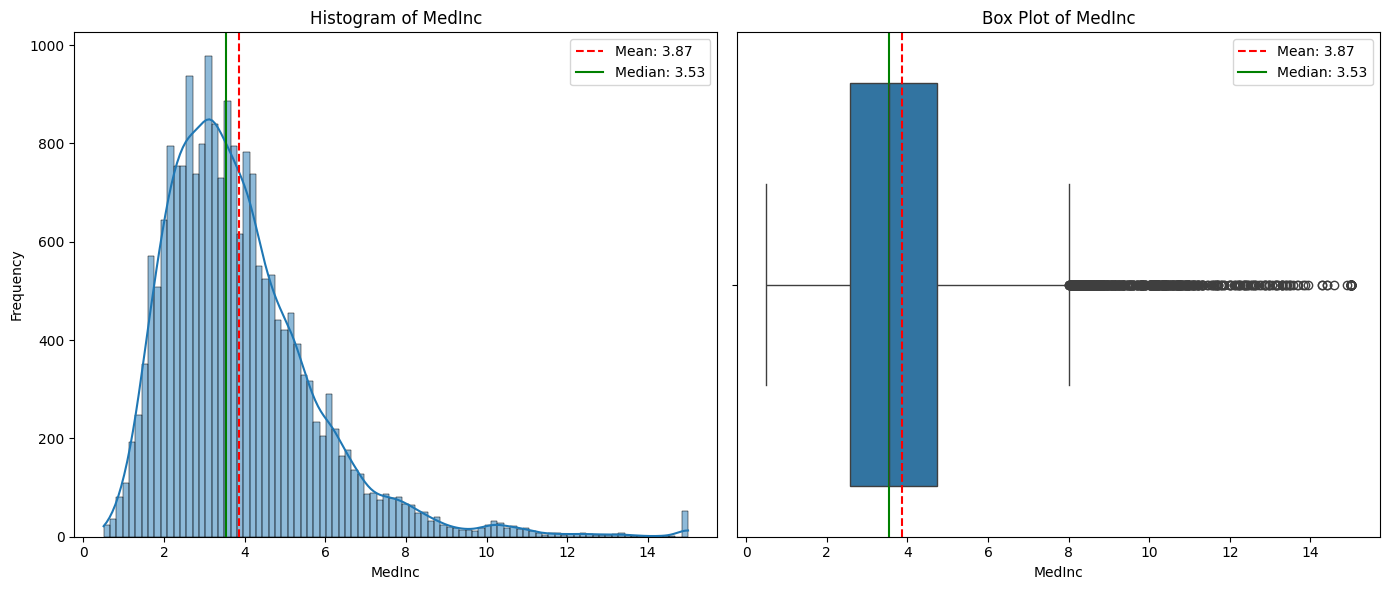

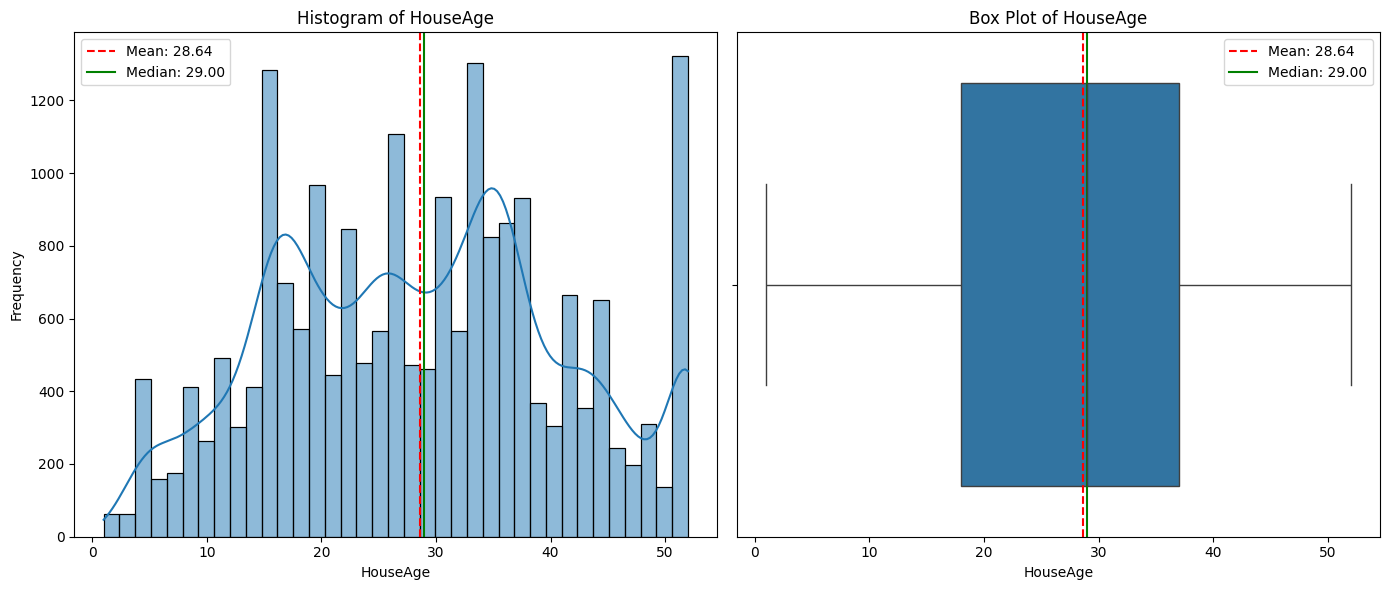

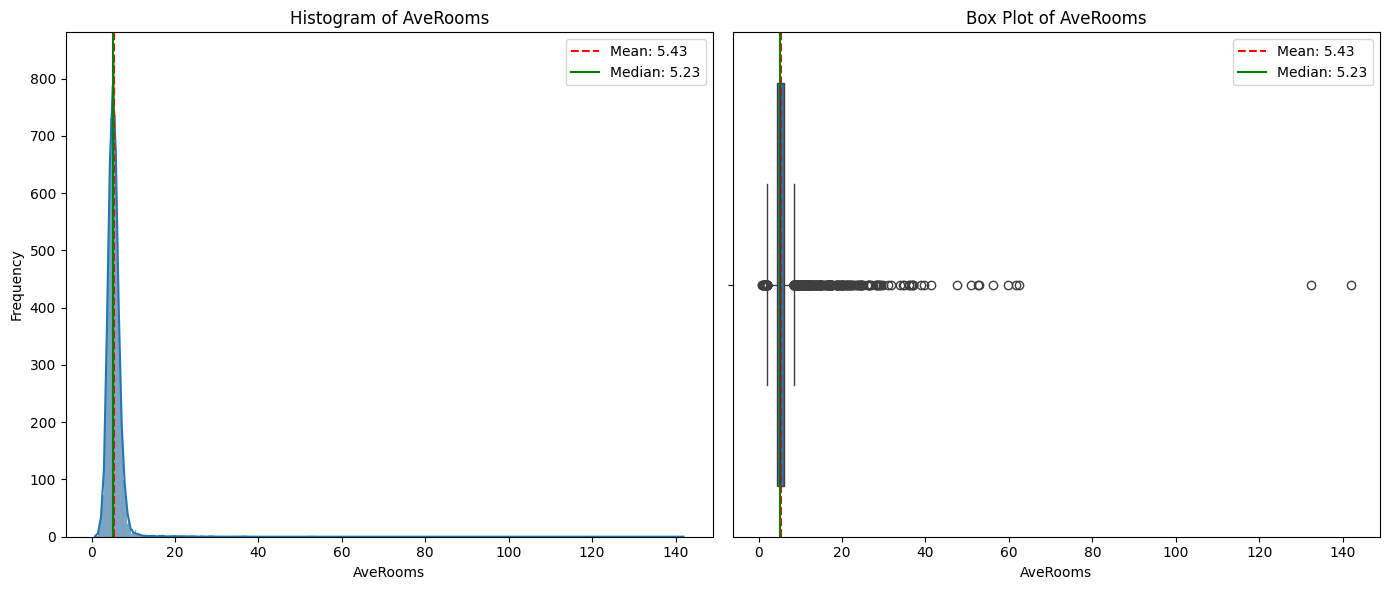

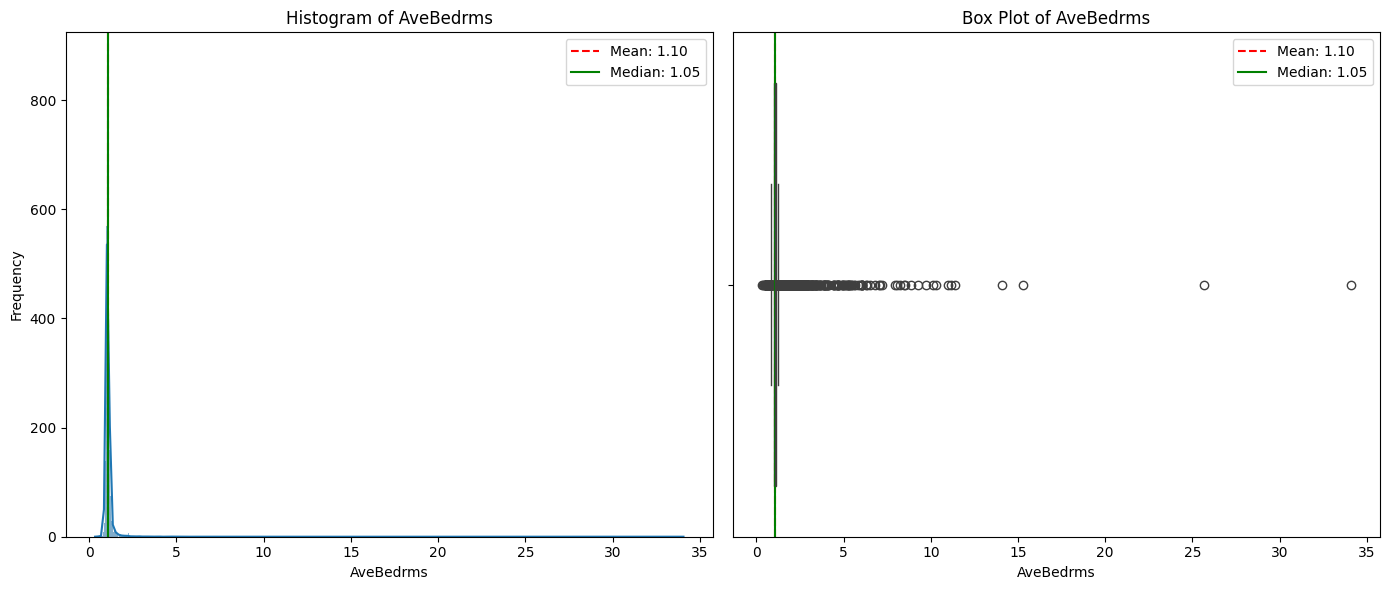

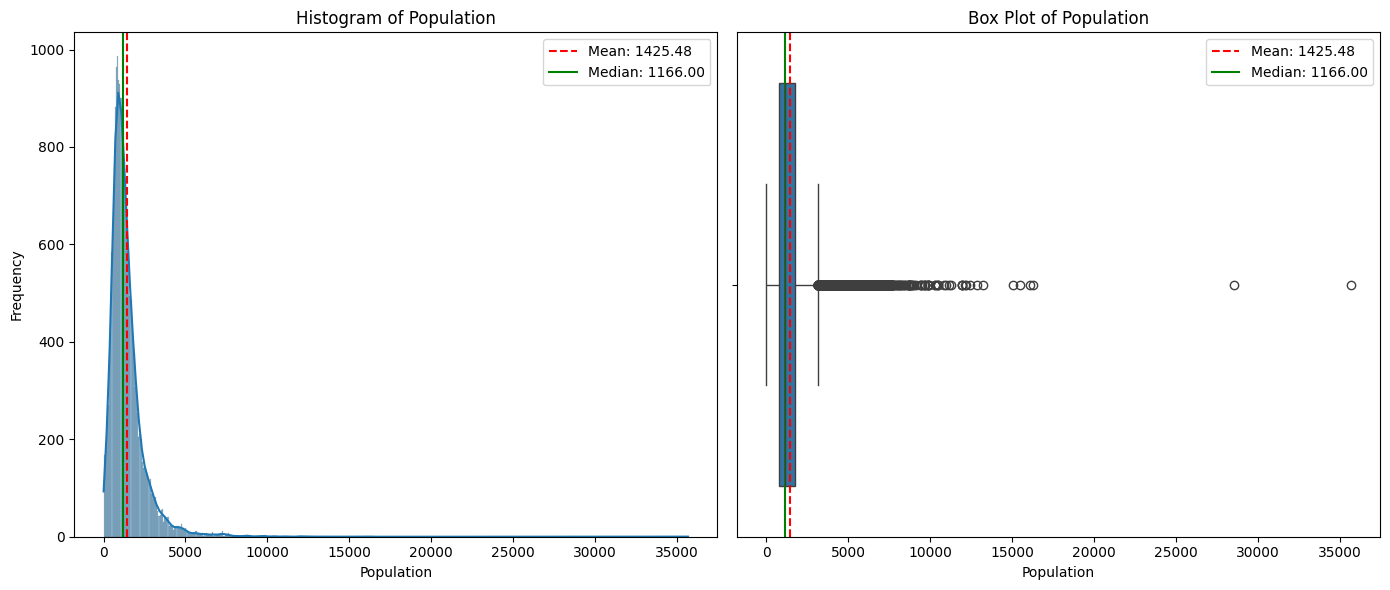

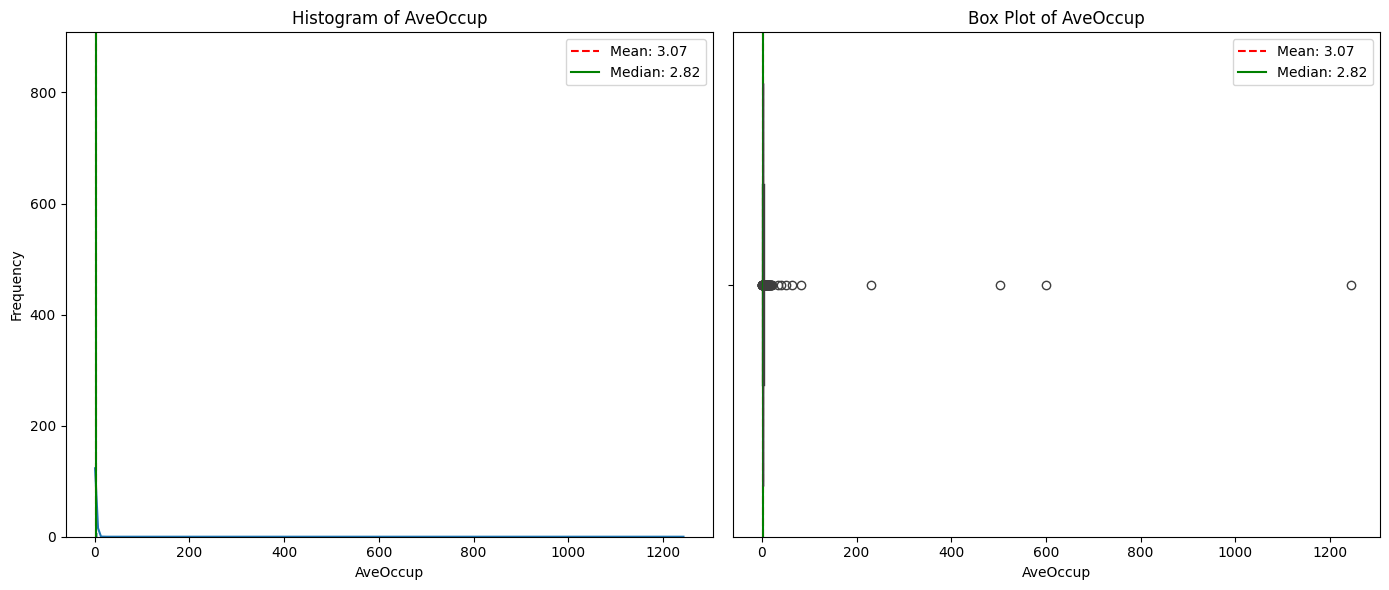

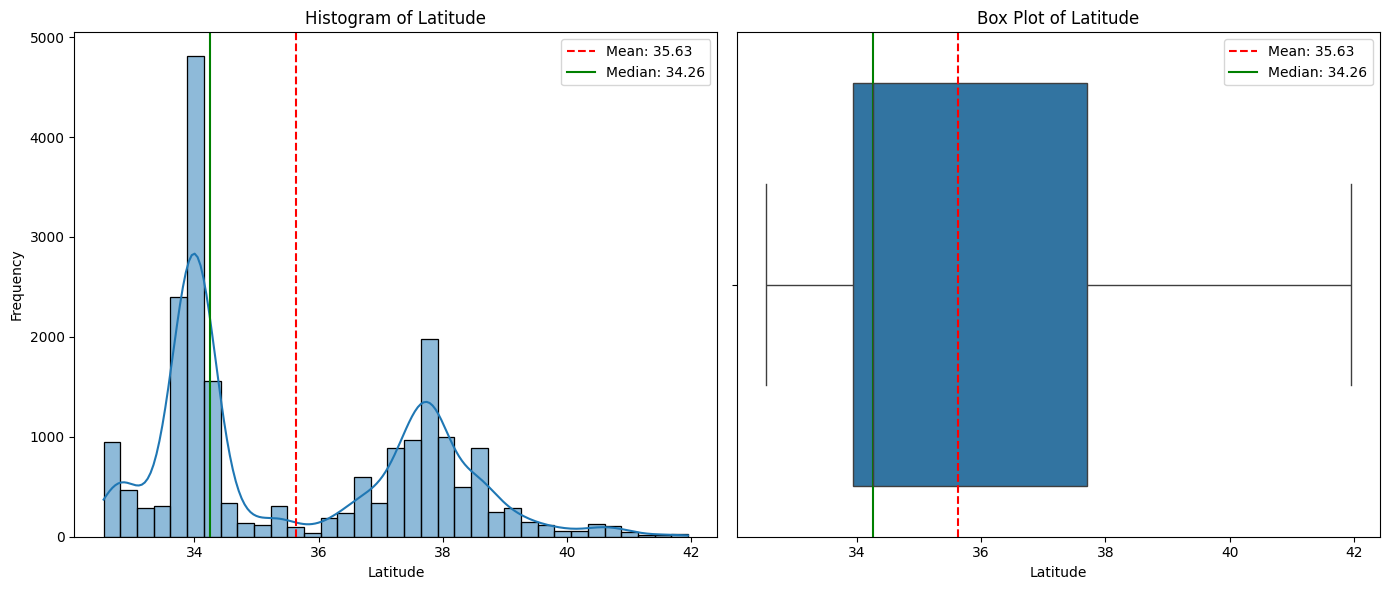

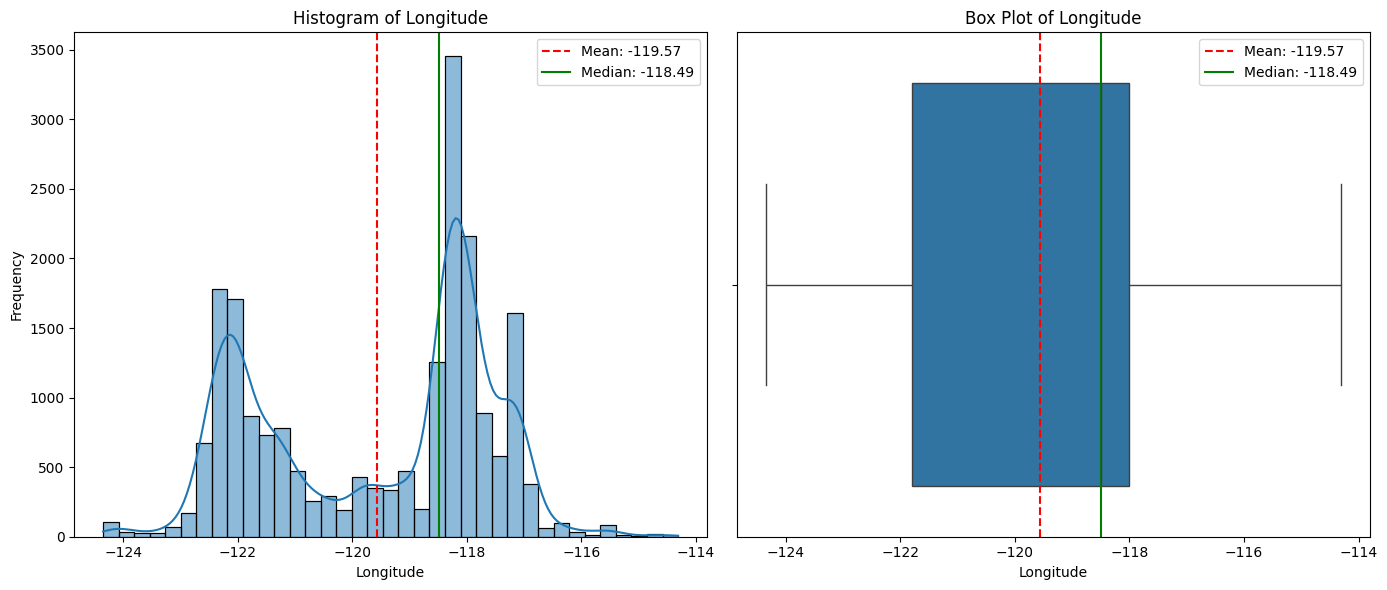

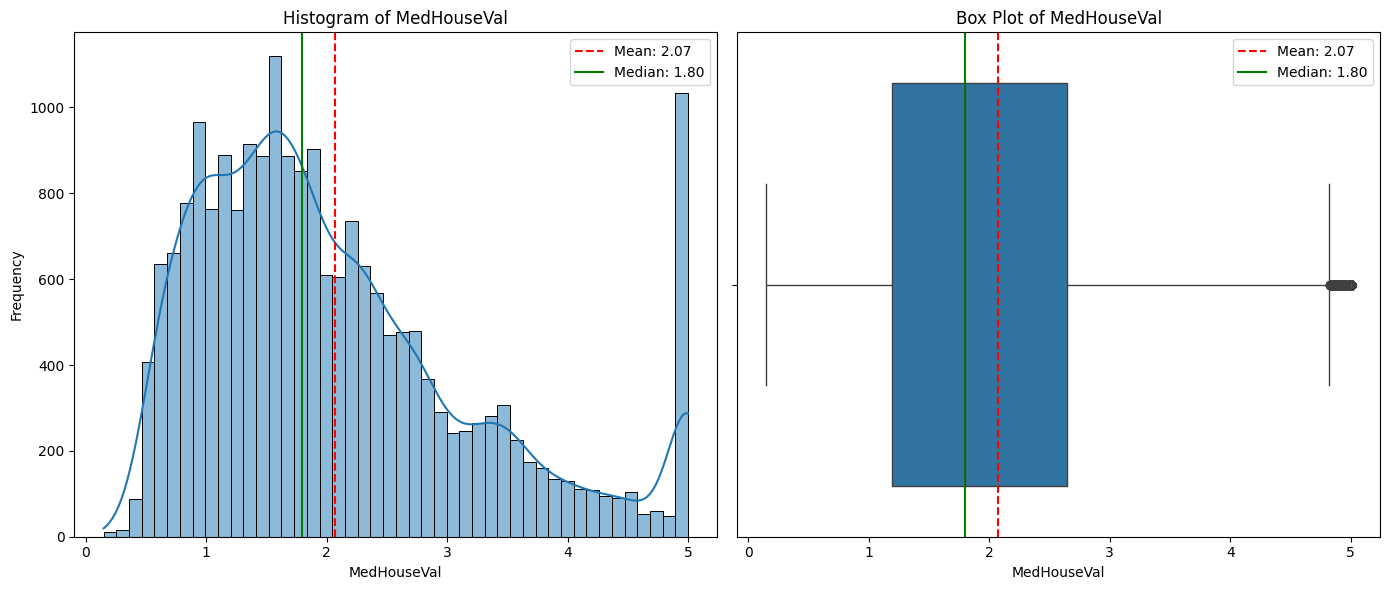

In [ ]:
for x in data.columns:
  univariate_Analysis(x)
